##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificacion Basica: Predecir una imagen de moda

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/es-419/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: Nuestra comunidad de Tensorflow ha traducido estos documentos. Como las traducciones de la comunidad
son basados en el "mejor esfuerzo", no hay ninguna garantia que esta sea un reflejo preciso y actual 
de la [Documentacion Oficial en Ingles](https://www.tensorflow.org/?hl=en).
Si tienen sugerencias sobre como mejorar esta traduccion, por favor envian un "Pull request"
al siguiente repositorio [tensorflow/docs](https://github.com/tensorflow/docs).
Para ofrecerse como voluntario o hacer revision de las traducciones de la Comunidad
por favor contacten al siguiente grupo [docs@tensorflow.org list](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. No hay problema sino entiende todos los detalles; es un repaso rapido de un programa completo de Tensorflow con los detalles explicados a medida que avanza.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [3]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 0s

 8396800/26421880 [========>.....................] - ETA: 0s

13443072/26421880 [==============>...............] - ETA: 0s

16785408/26421880 [==================>...........] - ETA: 0s

21520384/26421880 [=======================>......] - ETA: 0s

25174016/26421880 [===========================>..] - ETA: 0s

26427392/26421880 [==============================] - 1s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


[link text](https://)Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [6]:
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [7]:
len(train_labels)

60000

Cada etiqueta es un integro entre 0 y 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [9]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [10]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

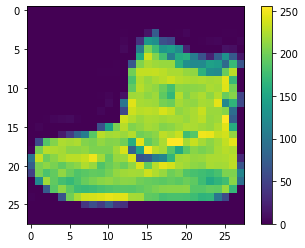

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

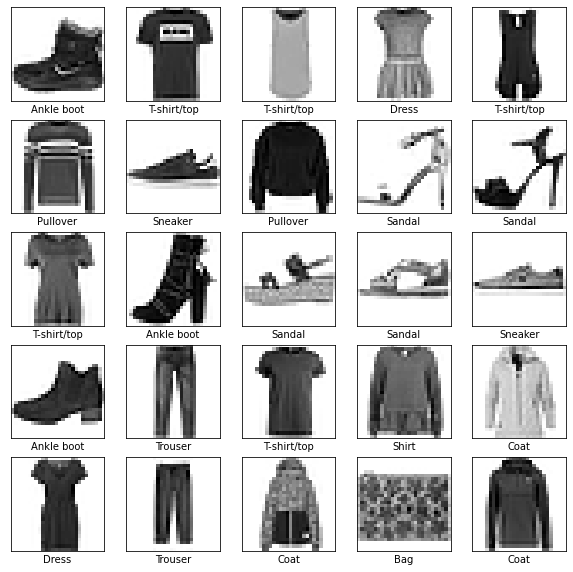

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.4750 - accuracy: 0.1250

  35/1875 [..............................] - ETA: 2s - loss: 1.3644 - accuracy: 0.5732

  70/1875 [>.............................] - ETA: 2s - loss: 1.0950 - accuracy: 0.6371

 104/1875 [>.............................] - ETA: 2s - loss: 0.9755 - accuracy: 0.6689

 138/1875 [=>............................] - ETA: 2s - loss: 0.9059 - accuracy: 0.6904

 172/1875 [=>............................] - ETA: 2s - loss: 0.8516 - accuracy: 0.7057

 207/1875 [==>...........................] - ETA: 2s - loss: 0.8094 - accuracy: 0.7216

 241/1875 [==>...........................] - ETA: 2s - loss: 0.7767 - accuracy: 0.7329

 275/1875 [===>..........................] - ETA: 2s - loss: 0.7476 - accuracy: 0.7427

 310/1875 [===>..........................] - ETA: 2s - loss: 0.7216 - accuracy: 0.7521

 344/1875 [====>.........................] - ETA: 2s - loss: 0.7050 - accuracy: 0.7563

 378/1875 [=====>........................] - ETA: 2s - loss: 0.6920 - accuracy: 0.7602

 412/1875 [=====>........................] - ETA: 2s - loss: 0.6852 - accuracy: 0.7636

 446/1875 [======>.......................] - ETA: 2s - loss: 0.6774 - accuracy: 0.7665

 480/1875 [======>.......................] - ETA: 2s - loss: 0.6630 - accuracy: 0.7714

 514/1875 [=======>......................] - ETA: 2s - loss: 0.6523 - accuracy: 0.7747

 548/1875 [=======>......................] - ETA: 1s - loss: 0.6429 - accuracy: 0.7779

 583/1875 [========>.....................] - ETA: 1s - loss: 0.6336 - accuracy: 0.7815

 618/1875 [========>.....................] - ETA: 1s - loss: 0.6267 - accuracy: 0.7833

 652/1875 [=========>....................] - ETA: 1s - loss: 0.6201 - accuracy: 0.7857

 687/1875 [=========>....................] - ETA: 1s - loss: 0.6131 - accuracy: 0.7870

 722/1875 [==========>...................] - ETA: 1s - loss: 0.6064 - accuracy: 0.7886

 756/1875 [===========>..................] - ETA: 1s - loss: 0.6013 - accuracy: 0.7901

 791/1875 [===========>..................] - ETA: 1s - loss: 0.5944 - accuracy: 0.7927

 826/1875 [============>.................] - ETA: 1s - loss: 0.5886 - accuracy: 0.7946

 860/1875 [============>.................] - ETA: 1s - loss: 0.5855 - accuracy: 0.7957

 894/1875 [=============>................] - ETA: 1s - loss: 0.5809 - accuracy: 0.7975

 928/1875 [=============>................] - ETA: 1s - loss: 0.5759 - accuracy: 0.7996

 962/1875 [==============>...............] - ETA: 1s - loss: 0.5716 - accuracy: 0.8010

 996/1875 [==============>...............] - ETA: 1s - loss: 0.5686 - accuracy: 0.8017

1031/1875 [===============>..............] - ETA: 1s - loss: 0.5642 - accuracy: 0.8034

1066/1875 [================>.............] - ETA: 1s - loss: 0.5608 - accuracy: 0.8044

1100/1875 [================>.............] - ETA: 1s - loss: 0.5564 - accuracy: 0.8062

1134/1875 [=================>............] - ETA: 1s - loss: 0.5527 - accuracy: 0.8077

1168/1875 [=================>............] - ETA: 1s - loss: 0.5507 - accuracy: 0.8083

1202/1875 [==================>...........] - ETA: 0s - loss: 0.5479 - accuracy: 0.8091

1236/1875 [==================>...........] - ETA: 0s - loss: 0.5449 - accuracy: 0.8099

1271/1875 [===================>..........] - ETA: 0s - loss: 0.5418 - accuracy: 0.8109

1306/1875 [===================>..........] - ETA: 0s - loss: 0.5398 - accuracy: 0.8117

1341/1875 [====================>.........] - ETA: 0s - loss: 0.5377 - accuracy: 0.8126

1375/1875 [=====================>........] - ETA: 0s - loss: 0.5345 - accuracy: 0.8133

1409/1875 [=====================>........] - ETA: 0s - loss: 0.5313 - accuracy: 0.8143

1443/1875 [======================>.......] - ETA: 0s - loss: 0.5289 - accuracy: 0.8152

1477/1875 [======================>.......] - ETA: 0s - loss: 0.5257 - accuracy: 0.8162

1511/1875 [=======================>......] - ETA: 0s - loss: 0.5240 - accuracy: 0.8169

1546/1875 [=======================>......] - ETA: 0s - loss: 0.5218 - accuracy: 0.8175

1580/1875 [========================>.....] - ETA: 0s - loss: 0.5189 - accuracy: 0.8184

1614/1875 [========================>.....] - ETA: 0s - loss: 0.5158 - accuracy: 0.8192

1649/1875 [=========================>....] - ETA: 0s - loss: 0.5122 - accuracy: 0.8204

1683/1875 [=========================>....] - ETA: 0s - loss: 0.5100 - accuracy: 0.8210

1717/1875 [==========================>...] - ETA: 0s - loss: 0.5088 - accuracy: 0.8211

1752/1875 [===========================>..] - ETA: 0s - loss: 0.5067 - accuracy: 0.8221

1785/1875 [===========================>..] - ETA: 0s - loss: 0.5049 - accuracy: 0.8228

1820/1875 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.8233

1853/1875 [============================>.] - ETA: 0s - loss: 0.5012 - accuracy: 0.8238

1875/1875 [==============================] - 3s 1ms/step - loss: 0.5003 - accuracy: 0.8241


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3235 - accuracy: 0.8438

  33/1875 [..............................] - ETA: 2s - loss: 0.3450 - accuracy: 0.8816

  66/1875 [>.............................] - ETA: 2s - loss: 0.3862 - accuracy: 0.8617

 100/1875 [>.............................] - ETA: 2s - loss: 0.4087 - accuracy: 0.8594

 134/1875 [=>............................] - ETA: 2s - loss: 0.4085 - accuracy: 0.8601

 168/1875 [=>............................] - ETA: 2s - loss: 0.4066 - accuracy: 0.8609

 202/1875 [==>...........................] - ETA: 2s - loss: 0.3978 - accuracy: 0.8632

 235/1875 [==>...........................] - ETA: 2s - loss: 0.3924 - accuracy: 0.8636

 270/1875 [===>..........................] - ETA: 2s - loss: 0.3928 - accuracy: 0.8625

 305/1875 [===>..........................] - ETA: 2s - loss: 0.3941 - accuracy: 0.8618

 340/1875 [====>.........................] - ETA: 2s - loss: 0.3969 - accuracy: 0.8591

 374/1875 [====>.........................] - ETA: 2s - loss: 0.3965 - accuracy: 0.8598

 409/1875 [=====>........................] - ETA: 2s - loss: 0.3945 - accuracy: 0.8602

 444/1875 [======>.......................] - ETA: 2s - loss: 0.3913 - accuracy: 0.8610

 479/1875 [======>.......................] - ETA: 2s - loss: 0.3892 - accuracy: 0.8620

 514/1875 [=======>......................] - ETA: 2s - loss: 0.3870 - accuracy: 0.8622

 548/1875 [=======>......................] - ETA: 1s - loss: 0.3855 - accuracy: 0.8628

 582/1875 [========>.....................] - ETA: 1s - loss: 0.3849 - accuracy: 0.8628

 616/1875 [========>.....................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8622

 650/1875 [=========>....................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8615

 685/1875 [=========>....................] - ETA: 1s - loss: 0.3841 - accuracy: 0.8619

 719/1875 [==========>...................] - ETA: 1s - loss: 0.3867 - accuracy: 0.8614

 754/1875 [===========>..................] - ETA: 1s - loss: 0.3852 - accuracy: 0.8617

 789/1875 [===========>..................] - ETA: 1s - loss: 0.3840 - accuracy: 0.8622

 823/1875 [============>.................] - ETA: 1s - loss: 0.3850 - accuracy: 0.8620

 857/1875 [============>.................] - ETA: 1s - loss: 0.3856 - accuracy: 0.8621

 891/1875 [=============>................] - ETA: 1s - loss: 0.3856 - accuracy: 0.8620

 925/1875 [=============>................] - ETA: 1s - loss: 0.3861 - accuracy: 0.8617

 959/1875 [==============>...............] - ETA: 1s - loss: 0.3858 - accuracy: 0.8617

 993/1875 [==============>...............] - ETA: 1s - loss: 0.3842 - accuracy: 0.8625

1027/1875 [===============>..............] - ETA: 1s - loss: 0.3830 - accuracy: 0.8629

1062/1875 [===============>..............] - ETA: 1s - loss: 0.3829 - accuracy: 0.8628

1096/1875 [================>.............] - ETA: 1s - loss: 0.3816 - accuracy: 0.8632

1130/1875 [=================>............] - ETA: 1s - loss: 0.3816 - accuracy: 0.8632

1164/1875 [=================>............] - ETA: 1s - loss: 0.3817 - accuracy: 0.8630

1198/1875 [==================>...........] - ETA: 1s - loss: 0.3817 - accuracy: 0.8630

1232/1875 [==================>...........] - ETA: 0s - loss: 0.3810 - accuracy: 0.8628

1266/1875 [===================>..........] - ETA: 0s - loss: 0.3808 - accuracy: 0.8631

1300/1875 [===================>..........] - ETA: 0s - loss: 0.3811 - accuracy: 0.8633

1335/1875 [====================>.........] - ETA: 0s - loss: 0.3804 - accuracy: 0.8636

1368/1875 [====================>.........] - ETA: 0s - loss: 0.3795 - accuracy: 0.8638

1402/1875 [=====================>........] - ETA: 0s - loss: 0.3786 - accuracy: 0.8642

1437/1875 [=====================>........] - ETA: 0s - loss: 0.3783 - accuracy: 0.8644

1472/1875 [======================>.......] - ETA: 0s - loss: 0.3776 - accuracy: 0.8648

1505/1875 [=======================>......] - ETA: 0s - loss: 0.3772 - accuracy: 0.8648

1539/1875 [=======================>......] - ETA: 0s - loss: 0.3759 - accuracy: 0.8653

1574/1875 [========================>.....] - ETA: 0s - loss: 0.3756 - accuracy: 0.8654

1608/1875 [========================>.....] - ETA: 0s - loss: 0.3751 - accuracy: 0.8656

1642/1875 [=========================>....] - ETA: 0s - loss: 0.3753 - accuracy: 0.8658

1676/1875 [=========================>....] - ETA: 0s - loss: 0.3748 - accuracy: 0.8658

1710/1875 [==========================>...] - ETA: 0s - loss: 0.3747 - accuracy: 0.8657

1744/1875 [==========================>...] - ETA: 0s - loss: 0.3752 - accuracy: 0.8657

1778/1875 [===========================>..] - ETA: 0s - loss: 0.3745 - accuracy: 0.8658

1813/1875 [============================>.] - ETA: 0s - loss: 0.3745 - accuracy: 0.8661

1848/1875 [============================>.] - ETA: 0s - loss: 0.3746 - accuracy: 0.8662

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3747 - accuracy: 0.8661


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1675 - accuracy: 0.9375

  36/1875 [..............................] - ETA: 2s - loss: 0.3319 - accuracy: 0.8741

  70/1875 [>.............................] - ETA: 2s - loss: 0.3328 - accuracy: 0.8781

 104/1875 [>.............................] - ETA: 2s - loss: 0.3235 - accuracy: 0.8834

 139/1875 [=>............................] - ETA: 2s - loss: 0.3237 - accuracy: 0.8833

 173/1875 [=>............................] - ETA: 2s - loss: 0.3257 - accuracy: 0.8801

 208/1875 [==>...........................] - ETA: 2s - loss: 0.3338 - accuracy: 0.8777

 243/1875 [==>...........................] - ETA: 2s - loss: 0.3362 - accuracy: 0.8760

 278/1875 [===>..........................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8750

 312/1875 [===>..........................] - ETA: 2s - loss: 0.3375 - accuracy: 0.8766

 346/1875 [====>.........................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8764

 381/1875 [=====>........................] - ETA: 2s - loss: 0.3371 - accuracy: 0.8763

 415/1875 [=====>........................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8761

 449/1875 [======>.......................] - ETA: 2s - loss: 0.3359 - accuracy: 0.8762

 483/1875 [======>.......................] - ETA: 2s - loss: 0.3373 - accuracy: 0.8763

 517/1875 [=======>......................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8761

 552/1875 [=======>......................] - ETA: 1s - loss: 0.3394 - accuracy: 0.8760

 587/1875 [========>.....................] - ETA: 1s - loss: 0.3375 - accuracy: 0.8771

 622/1875 [========>.....................] - ETA: 1s - loss: 0.3364 - accuracy: 0.8774

 656/1875 [=========>....................] - ETA: 1s - loss: 0.3367 - accuracy: 0.8772

 690/1875 [==========>...................] - ETA: 1s - loss: 0.3359 - accuracy: 0.8774

 724/1875 [==========>...................] - ETA: 1s - loss: 0.3351 - accuracy: 0.8775

 757/1875 [===========>..................] - ETA: 1s - loss: 0.3334 - accuracy: 0.8783

 791/1875 [===========>..................] - ETA: 1s - loss: 0.3340 - accuracy: 0.8781

 826/1875 [============>.................] - ETA: 1s - loss: 0.3344 - accuracy: 0.8776

 860/1875 [============>.................] - ETA: 1s - loss: 0.3350 - accuracy: 0.8775

 894/1875 [=============>................] - ETA: 1s - loss: 0.3352 - accuracy: 0.8775

 928/1875 [=============>................] - ETA: 1s - loss: 0.3362 - accuracy: 0.8770

 962/1875 [==============>...............] - ETA: 1s - loss: 0.3371 - accuracy: 0.8770

 997/1875 [==============>...............] - ETA: 1s - loss: 0.3377 - accuracy: 0.8770

1031/1875 [===============>..............] - ETA: 1s - loss: 0.3368 - accuracy: 0.8771

1065/1875 [================>.............] - ETA: 1s - loss: 0.3370 - accuracy: 0.8768

1099/1875 [================>.............] - ETA: 1s - loss: 0.3381 - accuracy: 0.8765

1134/1875 [=================>............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8771

1169/1875 [=================>............] - ETA: 1s - loss: 0.3372 - accuracy: 0.8770

1204/1875 [==================>...........] - ETA: 0s - loss: 0.3373 - accuracy: 0.8772

1239/1875 [==================>...........] - ETA: 0s - loss: 0.3380 - accuracy: 0.8769

1274/1875 [===================>..........] - ETA: 0s - loss: 0.3364 - accuracy: 0.8776

1308/1875 [===================>..........] - ETA: 0s - loss: 0.3357 - accuracy: 0.8779

1342/1875 [====================>.........] - ETA: 0s - loss: 0.3366 - accuracy: 0.8775

1376/1875 [=====================>........] - ETA: 0s - loss: 0.3359 - accuracy: 0.8779

1410/1875 [=====================>........] - ETA: 0s - loss: 0.3350 - accuracy: 0.8780

1445/1875 [======================>.......] - ETA: 0s - loss: 0.3349 - accuracy: 0.8778

1479/1875 [======================>.......] - ETA: 0s - loss: 0.3336 - accuracy: 0.8780

1513/1875 [=======================>......] - ETA: 0s - loss: 0.3335 - accuracy: 0.8781

1547/1875 [=======================>......] - ETA: 0s - loss: 0.3335 - accuracy: 0.8783

1581/1875 [========================>.....] - ETA: 0s - loss: 0.3332 - accuracy: 0.8784

1616/1875 [========================>.....] - ETA: 0s - loss: 0.3334 - accuracy: 0.8784

1650/1875 [=========================>....] - ETA: 0s - loss: 0.3340 - accuracy: 0.8784

1684/1875 [=========================>....] - ETA: 0s - loss: 0.3350 - accuracy: 0.8779

1718/1875 [==========================>...] - ETA: 0s - loss: 0.3343 - accuracy: 0.8783

1752/1875 [===========================>..] - ETA: 0s - loss: 0.3346 - accuracy: 0.8784

1787/1875 [===========================>..] - ETA: 0s - loss: 0.3347 - accuracy: 0.8784

1821/1875 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8782

1855/1875 [============================>.] - ETA: 0s - loss: 0.3355 - accuracy: 0.8778

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.8776


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3793 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.3246 - accuracy: 0.8768

  68/1875 [>.............................] - ETA: 2s - loss: 0.3076 - accuracy: 0.8842

 100/1875 [>.............................] - ETA: 2s - loss: 0.3153 - accuracy: 0.8831

 133/1875 [=>............................] - ETA: 2s - loss: 0.3115 - accuracy: 0.8863

 166/1875 [=>............................] - ETA: 2s - loss: 0.3206 - accuracy: 0.8829

 199/1875 [==>...........................] - ETA: 2s - loss: 0.3201 - accuracy: 0.8822

 233/1875 [==>...........................] - ETA: 2s - loss: 0.3188 - accuracy: 0.8830

 267/1875 [===>..........................] - ETA: 2s - loss: 0.3207 - accuracy: 0.8819

 300/1875 [===>..........................] - ETA: 2s - loss: 0.3224 - accuracy: 0.8818

 334/1875 [====>.........................] - ETA: 2s - loss: 0.3229 - accuracy: 0.8813

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3240 - accuracy: 0.8808

 401/1875 [=====>........................] - ETA: 2s - loss: 0.3217 - accuracy: 0.8825

 434/1875 [=====>........................] - ETA: 2s - loss: 0.3213 - accuracy: 0.8821

 468/1875 [======>.......................] - ETA: 2s - loss: 0.3211 - accuracy: 0.8827

 502/1875 [=======>......................] - ETA: 2s - loss: 0.3221 - accuracy: 0.8821

 536/1875 [=======>......................] - ETA: 2s - loss: 0.3224 - accuracy: 0.8824

 570/1875 [========>.....................] - ETA: 1s - loss: 0.3205 - accuracy: 0.8825

 604/1875 [========>.....................] - ETA: 1s - loss: 0.3188 - accuracy: 0.8832

 638/1875 [=========>....................] - ETA: 1s - loss: 0.3203 - accuracy: 0.8825

 672/1875 [=========>....................] - ETA: 1s - loss: 0.3194 - accuracy: 0.8824

 707/1875 [==========>...................] - ETA: 1s - loss: 0.3193 - accuracy: 0.8826

 740/1875 [==========>...................] - ETA: 1s - loss: 0.3210 - accuracy: 0.8822

 774/1875 [===========>..................] - ETA: 1s - loss: 0.3201 - accuracy: 0.8823

 807/1875 [===========>..................] - ETA: 1s - loss: 0.3199 - accuracy: 0.8825

 841/1875 [============>.................] - ETA: 1s - loss: 0.3206 - accuracy: 0.8820

 874/1875 [============>.................] - ETA: 1s - loss: 0.3223 - accuracy: 0.8818

 908/1875 [=============>................] - ETA: 1s - loss: 0.3212 - accuracy: 0.8822

 942/1875 [==============>...............] - ETA: 1s - loss: 0.3219 - accuracy: 0.8817

 976/1875 [==============>...............] - ETA: 1s - loss: 0.3207 - accuracy: 0.8819

1010/1875 [===============>..............] - ETA: 1s - loss: 0.3192 - accuracy: 0.8822

1044/1875 [===============>..............] - ETA: 1s - loss: 0.3181 - accuracy: 0.8825

1078/1875 [================>.............] - ETA: 1s - loss: 0.3182 - accuracy: 0.8827

1112/1875 [================>.............] - ETA: 1s - loss: 0.3178 - accuracy: 0.8828

1146/1875 [=================>............] - ETA: 1s - loss: 0.3179 - accuracy: 0.8829

1180/1875 [=================>............] - ETA: 1s - loss: 0.3175 - accuracy: 0.8832

1214/1875 [==================>...........] - ETA: 0s - loss: 0.3175 - accuracy: 0.8832

1249/1875 [==================>...........] - ETA: 0s - loss: 0.3171 - accuracy: 0.8834

1283/1875 [===================>..........] - ETA: 0s - loss: 0.3163 - accuracy: 0.8835

1317/1875 [====================>.........] - ETA: 0s - loss: 0.3169 - accuracy: 0.8834

1351/1875 [====================>.........] - ETA: 0s - loss: 0.3165 - accuracy: 0.8836

1385/1875 [=====================>........] - ETA: 0s - loss: 0.3157 - accuracy: 0.8837

1418/1875 [=====================>........] - ETA: 0s - loss: 0.3159 - accuracy: 0.8835

1453/1875 [======================>.......] - ETA: 0s - loss: 0.3149 - accuracy: 0.8838

1485/1875 [======================>.......] - ETA: 0s - loss: 0.3141 - accuracy: 0.8841

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3134 - accuracy: 0.8845

1553/1875 [=======================>......] - ETA: 0s - loss: 0.3130 - accuracy: 0.8849

1586/1875 [========================>.....] - ETA: 0s - loss: 0.3126 - accuracy: 0.8851

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3122 - accuracy: 0.8852

1654/1875 [=========================>....] - ETA: 0s - loss: 0.3121 - accuracy: 0.8855

1687/1875 [=========================>....] - ETA: 0s - loss: 0.3121 - accuracy: 0.8855

1721/1875 [==========================>...] - ETA: 0s - loss: 0.3121 - accuracy: 0.8855

1754/1875 [===========================>..] - ETA: 0s - loss: 0.3116 - accuracy: 0.8855

1788/1875 [===========================>..] - ETA: 0s - loss: 0.3111 - accuracy: 0.8858

1822/1875 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8857

1855/1875 [============================>.] - ETA: 0s - loss: 0.3110 - accuracy: 0.8858

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3106 - accuracy: 0.8859


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8750

  34/1875 [..............................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8989

  68/1875 [>.............................] - ETA: 2s - loss: 0.2999 - accuracy: 0.8929

 102/1875 [>.............................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8888

 136/1875 [=>............................] - ETA: 2s - loss: 0.3012 - accuracy: 0.8890

 170/1875 [=>............................] - ETA: 2s - loss: 0.2936 - accuracy: 0.8908

 204/1875 [==>...........................] - ETA: 2s - loss: 0.2933 - accuracy: 0.8900

 238/1875 [==>...........................] - ETA: 2s - loss: 0.2884 - accuracy: 0.8914

 272/1875 [===>..........................] - ETA: 2s - loss: 0.2928 - accuracy: 0.8917

 306/1875 [===>..........................] - ETA: 2s - loss: 0.2886 - accuracy: 0.8935

 340/1875 [====>.........................] - ETA: 2s - loss: 0.2846 - accuracy: 0.8943

 375/1875 [=====>........................] - ETA: 2s - loss: 0.2826 - accuracy: 0.8951

 410/1875 [=====>........................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8950

 444/1875 [======>.......................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8941

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2875 - accuracy: 0.8937

 513/1875 [=======>......................] - ETA: 2s - loss: 0.2906 - accuracy: 0.8923

 547/1875 [=======>......................] - ETA: 1s - loss: 0.2917 - accuracy: 0.8914

 582/1875 [========>.....................] - ETA: 1s - loss: 0.2905 - accuracy: 0.8919

 616/1875 [========>.....................] - ETA: 1s - loss: 0.2937 - accuracy: 0.8907

 651/1875 [=========>....................] - ETA: 1s - loss: 0.2948 - accuracy: 0.8907

 685/1875 [=========>....................] - ETA: 1s - loss: 0.2965 - accuracy: 0.8896

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2952 - accuracy: 0.8895

 754/1875 [===========>..................] - ETA: 1s - loss: 0.2949 - accuracy: 0.8896

 789/1875 [===========>..................] - ETA: 1s - loss: 0.2950 - accuracy: 0.8898

 824/1875 [============>.................] - ETA: 1s - loss: 0.2941 - accuracy: 0.8904

 858/1875 [============>.................] - ETA: 1s - loss: 0.2939 - accuracy: 0.8903

 894/1875 [=============>................] - ETA: 1s - loss: 0.2930 - accuracy: 0.8908

 928/1875 [=============>................] - ETA: 1s - loss: 0.2935 - accuracy: 0.8909

 962/1875 [==============>...............] - ETA: 1s - loss: 0.2928 - accuracy: 0.8913

 996/1875 [==============>...............] - ETA: 1s - loss: 0.2909 - accuracy: 0.8920

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2912 - accuracy: 0.8917

1064/1875 [================>.............] - ETA: 1s - loss: 0.2922 - accuracy: 0.8911

1098/1875 [================>.............] - ETA: 1s - loss: 0.2926 - accuracy: 0.8909

1132/1875 [=================>............] - ETA: 1s - loss: 0.2921 - accuracy: 0.8911

1165/1875 [=================>............] - ETA: 1s - loss: 0.2926 - accuracy: 0.8909

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2926 - accuracy: 0.8909

1233/1875 [==================>...........] - ETA: 0s - loss: 0.2927 - accuracy: 0.8908

1267/1875 [===================>..........] - ETA: 0s - loss: 0.2933 - accuracy: 0.8907

1302/1875 [===================>..........] - ETA: 0s - loss: 0.2948 - accuracy: 0.8902

1336/1875 [====================>.........] - ETA: 0s - loss: 0.2945 - accuracy: 0.8904

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2935 - accuracy: 0.8910

1404/1875 [=====================>........] - ETA: 0s - loss: 0.2928 - accuracy: 0.8913

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2928 - accuracy: 0.8913

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2937 - accuracy: 0.8910

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2937 - accuracy: 0.8908

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2939 - accuracy: 0.8905

1575/1875 [========================>.....] - ETA: 0s - loss: 0.2939 - accuracy: 0.8907

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2945 - accuracy: 0.8906

1643/1875 [=========================>....] - ETA: 0s - loss: 0.2943 - accuracy: 0.8908

1677/1875 [=========================>....] - ETA: 0s - loss: 0.2943 - accuracy: 0.8907

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2938 - accuracy: 0.8911

1745/1875 [==========================>...] - ETA: 0s - loss: 0.2941 - accuracy: 0.8912

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2941 - accuracy: 0.8911

1812/1875 [===========================>..] - ETA: 0s - loss: 0.2937 - accuracy: 0.8912

1846/1875 [============================>.] - ETA: 0s - loss: 0.2942 - accuracy: 0.8911

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8912


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8438

  36/1875 [..............................] - ETA: 2s - loss: 0.2717 - accuracy: 0.9123

  69/1875 [>.............................] - ETA: 2s - loss: 0.2880 - accuracy: 0.8995

 102/1875 [>.............................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8968

 136/1875 [=>............................] - ETA: 2s - loss: 0.2884 - accuracy: 0.8989

 169/1875 [=>............................] - ETA: 2s - loss: 0.2848 - accuracy: 0.8987

 203/1875 [==>...........................] - ETA: 2s - loss: 0.2863 - accuracy: 0.8987

 237/1875 [==>...........................] - ETA: 2s - loss: 0.2858 - accuracy: 0.8981

 271/1875 [===>..........................] - ETA: 2s - loss: 0.2864 - accuracy: 0.8979

 305/1875 [===>..........................] - ETA: 2s - loss: 0.2854 - accuracy: 0.8986

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2857 - accuracy: 0.8986

 373/1875 [====>.........................] - ETA: 2s - loss: 0.2861 - accuracy: 0.8983

 407/1875 [=====>........................] - ETA: 2s - loss: 0.2873 - accuracy: 0.8970

 441/1875 [======>.......................] - ETA: 2s - loss: 0.2856 - accuracy: 0.8971

 475/1875 [======>.......................] - ETA: 2s - loss: 0.2851 - accuracy: 0.8963

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2849 - accuracy: 0.8969

 543/1875 [=======>......................] - ETA: 1s - loss: 0.2863 - accuracy: 0.8959

 577/1875 [========>.....................] - ETA: 1s - loss: 0.2858 - accuracy: 0.8959

 610/1875 [========>.....................] - ETA: 1s - loss: 0.2865 - accuracy: 0.8950

 644/1875 [=========>....................] - ETA: 1s - loss: 0.2850 - accuracy: 0.8952

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2836 - accuracy: 0.8958

 712/1875 [==========>...................] - ETA: 1s - loss: 0.2833 - accuracy: 0.8955

 746/1875 [==========>...................] - ETA: 1s - loss: 0.2837 - accuracy: 0.8952

 780/1875 [===========>..................] - ETA: 1s - loss: 0.2839 - accuracy: 0.8954

 814/1875 [============>.................] - ETA: 1s - loss: 0.2846 - accuracy: 0.8953

 848/1875 [============>.................] - ETA: 1s - loss: 0.2843 - accuracy: 0.8952

 882/1875 [=============>................] - ETA: 1s - loss: 0.2832 - accuracy: 0.8955

 916/1875 [=============>................] - ETA: 1s - loss: 0.2825 - accuracy: 0.8958

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2826 - accuracy: 0.8958

 984/1875 [==============>...............] - ETA: 1s - loss: 0.2820 - accuracy: 0.8960

1018/1875 [===============>..............] - ETA: 1s - loss: 0.2812 - accuracy: 0.8962

1052/1875 [===============>..............] - ETA: 1s - loss: 0.2814 - accuracy: 0.8956

1085/1875 [================>.............] - ETA: 1s - loss: 0.2809 - accuracy: 0.8960

1118/1875 [================>.............] - ETA: 1s - loss: 0.2811 - accuracy: 0.8960

1152/1875 [=================>............] - ETA: 1s - loss: 0.2812 - accuracy: 0.8960

1186/1875 [=================>............] - ETA: 1s - loss: 0.2811 - accuracy: 0.8958

1220/1875 [==================>...........] - ETA: 0s - loss: 0.2802 - accuracy: 0.8962

1254/1875 [===================>..........] - ETA: 0s - loss: 0.2802 - accuracy: 0.8962

1288/1875 [===================>..........] - ETA: 0s - loss: 0.2811 - accuracy: 0.8961

1322/1875 [====================>.........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8961

1356/1875 [====================>.........] - ETA: 0s - loss: 0.2807 - accuracy: 0.8964

1391/1875 [=====================>........] - ETA: 0s - loss: 0.2803 - accuracy: 0.8963

1425/1875 [=====================>........] - ETA: 0s - loss: 0.2798 - accuracy: 0.8963

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2806 - accuracy: 0.8962

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2806 - accuracy: 0.8963

1528/1875 [=======================>......] - ETA: 0s - loss: 0.2801 - accuracy: 0.8965

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2799 - accuracy: 0.8966

1596/1875 [========================>.....] - ETA: 0s - loss: 0.2794 - accuracy: 0.8969

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2796 - accuracy: 0.8967

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2794 - accuracy: 0.8967

1699/1875 [==========================>...] - ETA: 0s - loss: 0.2791 - accuracy: 0.8969

1733/1875 [==========================>...] - ETA: 0s - loss: 0.2800 - accuracy: 0.8964

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2789 - accuracy: 0.8968

1798/1875 [===========================>..] - ETA: 0s - loss: 0.2793 - accuracy: 0.8967

1830/1875 [============================>.] - ETA: 0s - loss: 0.2796 - accuracy: 0.8966

1861/1875 [============================>.] - ETA: 0s - loss: 0.2800 - accuracy: 0.8965

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.8967


Epoch 7/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2288 - accuracy: 0.9062

  34/1875 [..............................] - ETA: 2s - loss: 0.2903 - accuracy: 0.8934

  67/1875 [>.............................] - ETA: 2s - loss: 0.2679 - accuracy: 0.9021

  99/1875 [>.............................] - ETA: 2s - loss: 0.2719 - accuracy: 0.9028

 131/1875 [=>............................] - ETA: 2s - loss: 0.2639 - accuracy: 0.9043

 164/1875 [=>............................] - ETA: 2s - loss: 0.2693 - accuracy: 0.9028

 197/1875 [==>...........................] - ETA: 2s - loss: 0.2694 - accuracy: 0.9024

 230/1875 [==>...........................] - ETA: 2s - loss: 0.2687 - accuracy: 0.9030

 264/1875 [===>..........................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9045

 297/1875 [===>..........................] - ETA: 2s - loss: 0.2657 - accuracy: 0.9028

 331/1875 [====>.........................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9023

 364/1875 [====>.........................] - ETA: 2s - loss: 0.2654 - accuracy: 0.9027

 398/1875 [=====>........................] - ETA: 2s - loss: 0.2688 - accuracy: 0.9009

 432/1875 [=====>........................] - ETA: 2s - loss: 0.2675 - accuracy: 0.9013

 466/1875 [======>.......................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9012

 500/1875 [=======>......................] - ETA: 2s - loss: 0.2668 - accuracy: 0.9006

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2649 - accuracy: 0.9012

 568/1875 [========>.....................] - ETA: 1s - loss: 0.2653 - accuracy: 0.9011

 602/1875 [========>.....................] - ETA: 1s - loss: 0.2667 - accuracy: 0.9011

 635/1875 [=========>....................] - ETA: 1s - loss: 0.2654 - accuracy: 0.9013

 668/1875 [=========>....................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9014

 701/1875 [==========>...................] - ETA: 1s - loss: 0.2645 - accuracy: 0.9024

 734/1875 [==========>...................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9021

 768/1875 [===========>..................] - ETA: 1s - loss: 0.2655 - accuracy: 0.9023

 801/1875 [===========>..................] - ETA: 1s - loss: 0.2656 - accuracy: 0.9022

 835/1875 [============>.................] - ETA: 1s - loss: 0.2644 - accuracy: 0.9023

 869/1875 [============>.................] - ETA: 1s - loss: 0.2631 - accuracy: 0.9028

 903/1875 [=============>................] - ETA: 1s - loss: 0.2635 - accuracy: 0.9025

 937/1875 [=============>................] - ETA: 1s - loss: 0.2637 - accuracy: 0.9021

 971/1875 [==============>...............] - ETA: 1s - loss: 0.2634 - accuracy: 0.9024

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2628 - accuracy: 0.9025

1040/1875 [===============>..............] - ETA: 1s - loss: 0.2620 - accuracy: 0.9030

1074/1875 [================>.............] - ETA: 1s - loss: 0.2615 - accuracy: 0.9031

1108/1875 [================>.............] - ETA: 1s - loss: 0.2621 - accuracy: 0.9031

1142/1875 [=================>............] - ETA: 1s - loss: 0.2629 - accuracy: 0.9027

1176/1875 [=================>............] - ETA: 1s - loss: 0.2629 - accuracy: 0.9029

1210/1875 [==================>...........] - ETA: 1s - loss: 0.2643 - accuracy: 0.9023

1244/1875 [==================>...........] - ETA: 0s - loss: 0.2645 - accuracy: 0.9023

1278/1875 [===================>..........] - ETA: 0s - loss: 0.2646 - accuracy: 0.9021

1311/1875 [===================>..........] - ETA: 0s - loss: 0.2650 - accuracy: 0.9021

1345/1875 [====================>.........] - ETA: 0s - loss: 0.2657 - accuracy: 0.9019

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9018

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2664 - accuracy: 0.9017

1446/1875 [======================>.......] - ETA: 0s - loss: 0.2665 - accuracy: 0.9014

1480/1875 [======================>.......] - ETA: 0s - loss: 0.2658 - accuracy: 0.9016

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2661 - accuracy: 0.9017

1546/1875 [=======================>......] - ETA: 0s - loss: 0.2668 - accuracy: 0.9013

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2666 - accuracy: 0.9015

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2668 - accuracy: 0.9015

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2667 - accuracy: 0.9015

1682/1875 [=========================>....] - ETA: 0s - loss: 0.2668 - accuracy: 0.9015

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2671 - accuracy: 0.9013

1751/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.9010

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2690 - accuracy: 0.9009

1819/1875 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.9007

1853/1875 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.9009

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.9010


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2126 - accuracy: 0.9375

  34/1875 [..............................] - ETA: 2s - loss: 0.2296 - accuracy: 0.9182

  68/1875 [>.............................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9099

 102/1875 [>.............................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9081

 136/1875 [=>............................] - ETA: 2s - loss: 0.2409 - accuracy: 0.9072

 170/1875 [=>............................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9064

 203/1875 [==>...........................] - ETA: 2s - loss: 0.2445 - accuracy: 0.9047

 237/1875 [==>...........................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9057

 270/1875 [===>..........................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9065

 304/1875 [===>..........................] - ETA: 2s - loss: 0.2438 - accuracy: 0.9066

 338/1875 [====>.........................] - ETA: 2s - loss: 0.2419 - accuracy: 0.9075

 371/1875 [====>.........................] - ETA: 2s - loss: 0.2427 - accuracy: 0.9071

 404/1875 [=====>........................] - ETA: 2s - loss: 0.2433 - accuracy: 0.9066

 438/1875 [======>.......................] - ETA: 2s - loss: 0.2453 - accuracy: 0.9063

 472/1875 [======>.......................] - ETA: 2s - loss: 0.2435 - accuracy: 0.9068

 505/1875 [=======>......................] - ETA: 2s - loss: 0.2465 - accuracy: 0.9059

 538/1875 [=======>......................] - ETA: 2s - loss: 0.2467 - accuracy: 0.9059

 572/1875 [========>.....................] - ETA: 1s - loss: 0.2478 - accuracy: 0.9057

 606/1875 [========>.....................] - ETA: 1s - loss: 0.2486 - accuracy: 0.9058

 640/1875 [=========>....................] - ETA: 1s - loss: 0.2489 - accuracy: 0.9056

 674/1875 [=========>....................] - ETA: 1s - loss: 0.2480 - accuracy: 0.9057

 709/1875 [==========>...................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9051

 744/1875 [==========>...................] - ETA: 1s - loss: 0.2504 - accuracy: 0.9047

 778/1875 [===========>..................] - ETA: 1s - loss: 0.2517 - accuracy: 0.9038

 811/1875 [===========>..................] - ETA: 1s - loss: 0.2529 - accuracy: 0.9035

 845/1875 [============>.................] - ETA: 1s - loss: 0.2548 - accuracy: 0.9025

 878/1875 [=============>................] - ETA: 1s - loss: 0.2564 - accuracy: 0.9021

 913/1875 [=============>................] - ETA: 1s - loss: 0.2570 - accuracy: 0.9019

 946/1875 [==============>...............] - ETA: 1s - loss: 0.2562 - accuracy: 0.9020

 980/1875 [==============>...............] - ETA: 1s - loss: 0.2557 - accuracy: 0.9020

1013/1875 [===============>..............] - ETA: 1s - loss: 0.2559 - accuracy: 0.9020

1047/1875 [===============>..............] - ETA: 1s - loss: 0.2558 - accuracy: 0.9023

1081/1875 [================>.............] - ETA: 1s - loss: 0.2556 - accuracy: 0.9024

1115/1875 [================>.............] - ETA: 1s - loss: 0.2553 - accuracy: 0.9025

1150/1875 [=================>............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9027

1184/1875 [=================>............] - ETA: 1s - loss: 0.2553 - accuracy: 0.9028

1218/1875 [==================>...........] - ETA: 0s - loss: 0.2563 - accuracy: 0.9027

1252/1875 [===================>..........] - ETA: 0s - loss: 0.2568 - accuracy: 0.9024

1286/1875 [===================>..........] - ETA: 0s - loss: 0.2568 - accuracy: 0.9025

1320/1875 [====================>.........] - ETA: 0s - loss: 0.2574 - accuracy: 0.9022

1354/1875 [====================>.........] - ETA: 0s - loss: 0.2582 - accuracy: 0.9020

1388/1875 [=====================>........] - ETA: 0s - loss: 0.2585 - accuracy: 0.9019

1422/1875 [=====================>........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9020

1456/1875 [======================>.......] - ETA: 0s - loss: 0.2586 - accuracy: 0.9021

1490/1875 [======================>.......] - ETA: 0s - loss: 0.2591 - accuracy: 0.9020

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2594 - accuracy: 0.9020

1559/1875 [=======================>......] - ETA: 0s - loss: 0.2587 - accuracy: 0.9023

1593/1875 [========================>.....] - ETA: 0s - loss: 0.2589 - accuracy: 0.9024

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2584 - accuracy: 0.9025

1660/1875 [=========================>....] - ETA: 0s - loss: 0.2592 - accuracy: 0.9024

1694/1875 [==========================>...] - ETA: 0s - loss: 0.2589 - accuracy: 0.9024

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2590 - accuracy: 0.9026

1762/1875 [===========================>..] - ETA: 0s - loss: 0.2584 - accuracy: 0.9028

1796/1875 [===========================>..] - ETA: 0s - loss: 0.2584 - accuracy: 0.9029

1830/1875 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.9029

1864/1875 [============================>.] - ETA: 0s - loss: 0.2583 - accuracy: 0.9030

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9030


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3450 - accuracy: 0.8438

  34/1875 [..............................] - ETA: 2s - loss: 0.2340 - accuracy: 0.9044

  68/1875 [>.............................] - ETA: 2s - loss: 0.2444 - accuracy: 0.9026

 102/1875 [>.............................] - ETA: 2s - loss: 0.2403 - accuracy: 0.9035

 135/1875 [=>............................] - ETA: 2s - loss: 0.2471 - accuracy: 0.9028

 169/1875 [=>............................] - ETA: 2s - loss: 0.2429 - accuracy: 0.9050

 202/1875 [==>...........................] - ETA: 2s - loss: 0.2443 - accuracy: 0.9050

 236/1875 [==>...........................] - ETA: 2s - loss: 0.2478 - accuracy: 0.9032

 270/1875 [===>..........................] - ETA: 2s - loss: 0.2488 - accuracy: 0.9016

 304/1875 [===>..........................] - ETA: 2s - loss: 0.2432 - accuracy: 0.9052

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2378 - accuracy: 0.9074

 374/1875 [====>.........................] - ETA: 2s - loss: 0.2377 - accuracy: 0.9080

 408/1875 [=====>........................] - ETA: 2s - loss: 0.2398 - accuracy: 0.9076

 442/1875 [======>.......................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9085

 476/1875 [======>.......................] - ETA: 2s - loss: 0.2388 - accuracy: 0.9092

 511/1875 [=======>......................] - ETA: 2s - loss: 0.2392 - accuracy: 0.9100

 546/1875 [=======>......................] - ETA: 1s - loss: 0.2396 - accuracy: 0.9089

 580/1875 [========>.....................] - ETA: 1s - loss: 0.2389 - accuracy: 0.9095

 615/1875 [========>.....................] - ETA: 1s - loss: 0.2385 - accuracy: 0.9095

 649/1875 [=========>....................] - ETA: 1s - loss: 0.2407 - accuracy: 0.9092

 684/1875 [=========>....................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9091

 719/1875 [==========>...................] - ETA: 1s - loss: 0.2398 - accuracy: 0.9092

 753/1875 [===========>..................] - ETA: 1s - loss: 0.2406 - accuracy: 0.9092

 787/1875 [===========>..................] - ETA: 1s - loss: 0.2404 - accuracy: 0.9095

 821/1875 [============>.................] - ETA: 1s - loss: 0.2406 - accuracy: 0.9090

 856/1875 [============>.................] - ETA: 1s - loss: 0.2412 - accuracy: 0.9087

 890/1875 [=============>................] - ETA: 1s - loss: 0.2419 - accuracy: 0.9086

 925/1875 [=============>................] - ETA: 1s - loss: 0.2424 - accuracy: 0.9085

 959/1875 [==============>...............] - ETA: 1s - loss: 0.2431 - accuracy: 0.9083

 993/1875 [==============>...............] - ETA: 1s - loss: 0.2424 - accuracy: 0.9087

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2422 - accuracy: 0.9086

1063/1875 [================>.............] - ETA: 1s - loss: 0.2424 - accuracy: 0.9088

1098/1875 [================>.............] - ETA: 1s - loss: 0.2438 - accuracy: 0.9080

1132/1875 [=================>............] - ETA: 1s - loss: 0.2443 - accuracy: 0.9079

1166/1875 [=================>............] - ETA: 1s - loss: 0.2443 - accuracy: 0.9083

1200/1875 [==================>...........] - ETA: 0s - loss: 0.2446 - accuracy: 0.9081

1235/1875 [==================>...........] - ETA: 0s - loss: 0.2456 - accuracy: 0.9079

1269/1875 [===================>..........] - ETA: 0s - loss: 0.2450 - accuracy: 0.9081

1303/1875 [===================>..........] - ETA: 0s - loss: 0.2450 - accuracy: 0.9078

1338/1875 [====================>.........] - ETA: 0s - loss: 0.2449 - accuracy: 0.9075

1373/1875 [====================>.........] - ETA: 0s - loss: 0.2453 - accuracy: 0.9075

1408/1875 [=====================>........] - ETA: 0s - loss: 0.2454 - accuracy: 0.9075

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2448 - accuracy: 0.9078

1477/1875 [======================>.......] - ETA: 0s - loss: 0.2450 - accuracy: 0.9079

1511/1875 [=======================>......] - ETA: 0s - loss: 0.2450 - accuracy: 0.9079

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2454 - accuracy: 0.9075

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2455 - accuracy: 0.9076

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2455 - accuracy: 0.9076

1649/1875 [=========================>....] - ETA: 0s - loss: 0.2450 - accuracy: 0.9079

1684/1875 [=========================>....] - ETA: 0s - loss: 0.2451 - accuracy: 0.9080

1718/1875 [==========================>...] - ETA: 0s - loss: 0.2451 - accuracy: 0.9080

1753/1875 [===========================>..] - ETA: 0s - loss: 0.2453 - accuracy: 0.9079

1788/1875 [===========================>..] - ETA: 0s - loss: 0.2454 - accuracy: 0.9080

1823/1875 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9077

1858/1875 [============================>.] - ETA: 0s - loss: 0.2464 - accuracy: 0.9076

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2468 - accuracy: 0.9074


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2577 - accuracy: 0.9375

  35/1875 [..............................] - ETA: 2s - loss: 0.2145 - accuracy: 0.9268

  69/1875 [>.............................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9126

 103/1875 [>.............................] - ETA: 2s - loss: 0.2388 - accuracy: 0.9135

 138/1875 [=>............................] - ETA: 2s - loss: 0.2377 - accuracy: 0.9139

 172/1875 [=>............................] - ETA: 2s - loss: 0.2393 - accuracy: 0.9126

 207/1875 [==>...........................] - ETA: 2s - loss: 0.2326 - accuracy: 0.9147

 241/1875 [==>...........................] - ETA: 2s - loss: 0.2307 - accuracy: 0.9151

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2325 - accuracy: 0.9134

 309/1875 [===>..........................] - ETA: 2s - loss: 0.2330 - accuracy: 0.9130

 344/1875 [====>.........................] - ETA: 2s - loss: 0.2347 - accuracy: 0.9120

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2356 - accuracy: 0.9118

 412/1875 [=====>........................] - ETA: 2s - loss: 0.2334 - accuracy: 0.9129

 446/1875 [======>.......................] - ETA: 2s - loss: 0.2336 - accuracy: 0.9135

 481/1875 [======>.......................] - ETA: 2s - loss: 0.2333 - accuracy: 0.9133

 516/1875 [=======>......................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9132

 551/1875 [=======>......................] - ETA: 1s - loss: 0.2334 - accuracy: 0.9134

 585/1875 [========>.....................] - ETA: 1s - loss: 0.2324 - accuracy: 0.9138

 619/1875 [========>.....................] - ETA: 1s - loss: 0.2341 - accuracy: 0.9132

 654/1875 [=========>....................] - ETA: 1s - loss: 0.2344 - accuracy: 0.9129

 689/1875 [==========>...................] - ETA: 1s - loss: 0.2331 - accuracy: 0.9132

 724/1875 [==========>...................] - ETA: 1s - loss: 0.2324 - accuracy: 0.9133

 758/1875 [===========>..................] - ETA: 1s - loss: 0.2322 - accuracy: 0.9133

 793/1875 [===========>..................] - ETA: 1s - loss: 0.2324 - accuracy: 0.9131

 828/1875 [============>.................] - ETA: 1s - loss: 0.2341 - accuracy: 0.9122

 862/1875 [============>.................] - ETA: 1s - loss: 0.2332 - accuracy: 0.9125

 896/1875 [=============>................] - ETA: 1s - loss: 0.2343 - accuracy: 0.9119

 929/1875 [=============>................] - ETA: 1s - loss: 0.2356 - accuracy: 0.9116

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2367 - accuracy: 0.9110

 999/1875 [==============>...............] - ETA: 1s - loss: 0.2369 - accuracy: 0.9110

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2358 - accuracy: 0.9112

1067/1875 [================>.............] - ETA: 1s - loss: 0.2374 - accuracy: 0.9108

1102/1875 [================>.............] - ETA: 1s - loss: 0.2363 - accuracy: 0.9113

1137/1875 [=================>............] - ETA: 1s - loss: 0.2363 - accuracy: 0.9111

1171/1875 [=================>............] - ETA: 1s - loss: 0.2377 - accuracy: 0.9107

1205/1875 [==================>...........] - ETA: 0s - loss: 0.2373 - accuracy: 0.9107

1239/1875 [==================>...........] - ETA: 0s - loss: 0.2385 - accuracy: 0.9103

1273/1875 [===================>..........] - ETA: 0s - loss: 0.2386 - accuracy: 0.9101

1308/1875 [===================>..........] - ETA: 0s - loss: 0.2377 - accuracy: 0.9105

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2367 - accuracy: 0.9110

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2366 - accuracy: 0.9111

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2369 - accuracy: 0.9110

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2368 - accuracy: 0.9110

1482/1875 [======================>.......] - ETA: 0s - loss: 0.2373 - accuracy: 0.9109

1517/1875 [=======================>......] - ETA: 0s - loss: 0.2374 - accuracy: 0.9109

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2375 - accuracy: 0.9107

1586/1875 [========================>.....] - ETA: 0s - loss: 0.2378 - accuracy: 0.9107

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2379 - accuracy: 0.9106

1655/1875 [=========================>....] - ETA: 0s - loss: 0.2375 - accuracy: 0.9107

1690/1875 [==========================>...] - ETA: 0s - loss: 0.2380 - accuracy: 0.9104

1724/1875 [==========================>...] - ETA: 0s - loss: 0.2383 - accuracy: 0.9104

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.9107

1794/1875 [===========================>..] - ETA: 0s - loss: 0.2381 - accuracy: 0.9108

1828/1875 [============================>.] - ETA: 0s - loss: 0.2388 - accuracy: 0.9106

1863/1875 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9106

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2386 - accuracy: 0.9106


A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3350 - accuracy: 0.8840



Test accuracy: 0.8840000033378601


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [18]:
predictions = model.predict(test_images)

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [19]:
predictions[0]

array([8.98017061e-06, 1.05824974e-07, 1.47653412e-09, 6.39178294e-11,
       6.63487398e-08, 1.56312122e-03, 3.97483973e-07, 6.77545443e-02,
       8.32966691e-08, 9.30672705e-01], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [20]:
np.argmax(predictions[0])

9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [21]:
test_labels[0]

9

**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

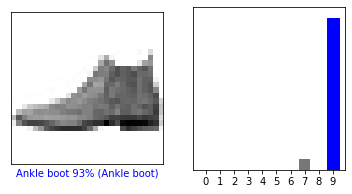

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

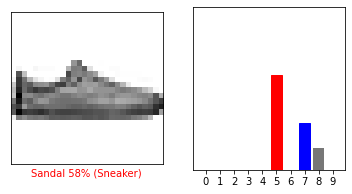

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

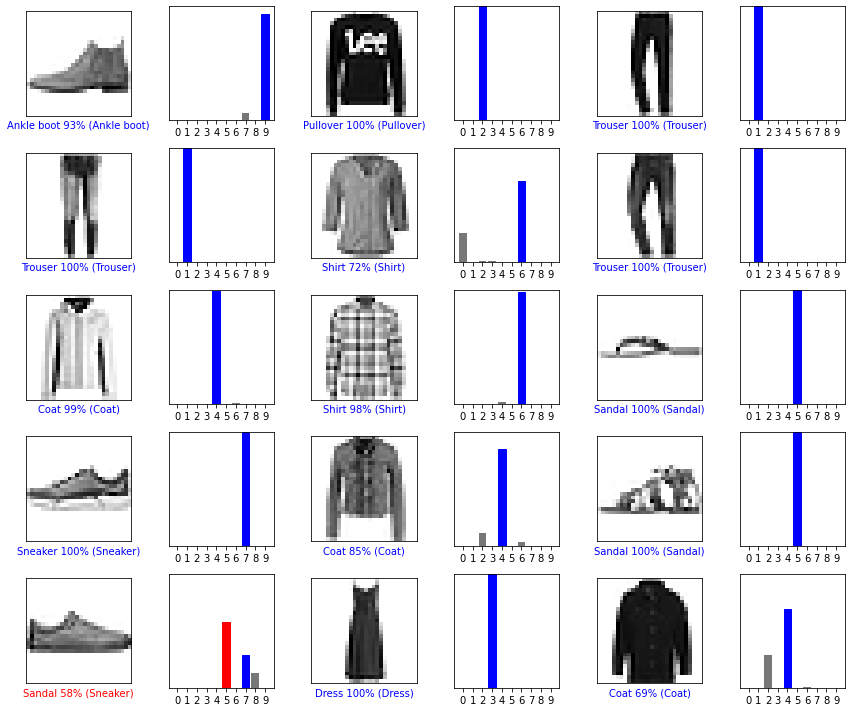

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.7196244e-05 2.3026301e-14 9.9943405e-01 3.2361061e-10 3.3726924e-04
  6.5815242e-11 2.0145018e-04 1.0427863e-13 4.7570725e-10 5.1079822e-15]]


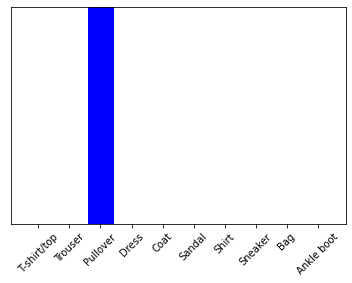

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [30]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.